# Air Pressure data from Weather News

In [ ]:
import pandas as pd

df = pd.read_csv('./data/soratena_tonga.csv')
df.head()

In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(data=df,geometry=gpd.points_from_xy(df['LOND'],df['LATD']))

In [ ]:
import matplotlib.style as mpls
mpls.use('default')

gdf.plot(column='ARPRSS',cmap='jet')

In [ ]:
df.describe()

In [ ]:
onepoint = df[df.SoratenaID == 1001]
onepoint.head()

In [ ]:
onepoint.plot('DATE(UTC)','ARPRSS',label='ID1001',cmap='jet',rot=45)

In [ ]:
import matplotlib.pyplot as plt

dt = 0.1
plt.specgram(df['ARPRSS'].to_numpy(),NFFT=256,Fs=1/dt,noverlap=10,cmap='jet_r')
plt.colorbar()
plt.show()

# Tsunami waveform

In [150]:
import pandas as pd
dft = pd.read_csv('./data/tide_japan.csv',index_col=0)
dft.head()

Kushiro_Tide  Miyako_Tide  Ofunato_Tide  Ayukawa_Tide  \
Time_min_Tide                                                          
0                        95           67            73            56   
5                        99           65            70            61   
10                      102           67            71            64   
15                      103           68            72            61   
20                      104           71            76            66   

               Onahama_Tide  Chichijima_Tide  Hachijojima_Tide  Irozaki_Tide  \
Time_min_Tide                                                                  
0                        52               38                94            53   
5                        58               38                95            57   
10                       61               37                97            57   
15                       60               39               101            60   
20                       60               36               100            59   

               Omaezaki_Tide  Kushimoto_Tide  Muroto_Tide  Tosashimizu_Tide  \
Time_min_Tide                                                                 
0                         43              47           70                45   
5                         46              57           68                51   
10                        47              58           69                52   
15                        50              54           72                53   
20                        49              56           71                51   

               Aburatsu_Tide  Makurazaki_Tide  Amami_Tide  
Time_min_Tide                                              
0                         41               47          42  
5                         35               28          48  
10                        37               32          43  
15                        42               50          41  
20                        43               29          59

In [151]:
dft.shape

(576, 15)

In [152]:
#Do not use first and last 500 records
dft = dft[100:-100]

In [ ]:
import matplotlib.style as mpls
mpls.use('default')

dft.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15));


In [ ]:
tempdf = pd.DataFrame()
tempdf['Amami_Tide'] = dft['Amami_Tide'].copy()
tempdf['index']= dft.index
tempdf.head()

In [ ]:
tempdf.to_numpy().shape

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided

# First, design the Kaiser filter
out = np.ndarray()
out.set_array(signal.kaiser(36, beta=14))
 
# Second, apply the filter
tempf = signal.filtfilt(b,a, dft.Amami_Tide.to_numpy())

#scale x axis
xt = np.arange(0,dft.shape[0]*5,5)
 
# Make plots
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(xt,dft.Amami_Tide.to_numpy(), c='k',lw=0.5)
plt.plot(xt,tempf, 'r-',linewidth=1)
plt.ylabel("h,m")
plt.legend(['Original','Filtered'])
plt.title("Waveform")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(xt,dft.Amami_Tide.to_numpy()-tempf,c='k',lw=0.5)
plt.ylabel("h,m")
plt.xlabel("Time(s)")
plt.legend(['Residuals'])

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.5 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
tempf = signal.filtfilt(B,A, dft.Amami_Tide.to_numpy())

#scale x axis
xt = np.arange(0,dft.shape[0]*5,5)
 
# Make plots
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(xt,dft.Amami_Tide.to_numpy(), c='k',lw=0.5)
plt.plot(xt,tempf, 'r-',linewidth=1)
plt.ylabel("h,m")
plt.legend(['Original','Filtered'])
plt.title("Waveform")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(xt,dft.Amami_Tide.to_numpy()-tempf,c='k',lw=0.5)
plt.ylabel("h,m")
plt.xlabel("Time(s)")
plt.legend(['Residuals'])

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt

def detide_tsunami(t,col,N=2,Wn=0.5):
    # First, design the Buterworth filter
    # N  = 2    # Filter order
    # Wn = 0.5 # Cutoff frequency
    B, A = signal.butter(N, Wn, output='ba')
    
    # Second, apply the filter
    tempf = signal.filtfilt(B,A,col)
    
    # # Make plots
    # fig = plt.figure()
    # ax1 = fig.add_subplot(211)
    # plt.plot(t,col, c='k',lw=0.5)
    # plt.plot(t,tempf, 'r-',linewidth=1)
    # plt.ylabel("h,m")
    # plt.legend(['Original','Filtered'])
    # plt.title("Waveform")
    # ax1.axes.get_xaxis().set_visible(False)
    
    # ax1 = fig.add_subplot(212)
    res=col-tempf
    # plt.plot(t,res,c='k',lw=0.5)
    # plt.ylabel("h,m")
    # plt.xlabel("Time(min)")
    # plt.legend(['Residuals'])
    return res

In [ ]:
fig,axs = plt.subplots(5,3,sharex=True,sharey=True,figsize=(15,15))
dt = 5
for j in range(5):
    for k in range(3):
        # s,f,t,im = axs[j,k].specgram(dft.iloc[:,3*j+k],NFFT=256,Fs=12/dt,noverlap=128,
                                    #  cmap='jet_r',mode='psd',vmin=-50, vmax=200)
        s,f,t,im = axs[j,k].specgram(dft.iloc[:,3*j+k],Fs=5/dt,cmap='jet_r')
        axs[j,k].set_title(dft.columns[3*j+k])
        axs[k,k].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
fig.colorbar(im,cax=cbar_ax)

for ax in axs.flat:
    ax.set(xlabel='Time(min)', ylabel='Frequency (cpm)')

In [ ]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

col = 14
dt = 5

fig,axs = plt.subplots(2,sharex=False,figsize=(8,8))
axs[0].plot(dft.index.to_list(),dft.iloc[:,col].to_list(),c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dft.columns[col]}')
s,f,t,im = axs[1].specgram(dft.iloc[:,col],NFFT=int(20.*60./5.),Fs=5/dt,noverlap=int(6./5.),
                           cmap='jet',mode='psd')#,vmin=0,vmax=14)
# s,f,t,im = axs[1].specgram(dft.iloc[:,col],Fs=5/dt,cmap='jet_r',vmin=0,vmax=14)
axs[1].set_title(f'Spectogram: {dft.columns[col]}')
axs[1].set_xlabel('Time(min)')
axs[1].set_ylabel('Frequency (cpm)')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,10])
secax.set_yticklabels([2,5,10])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB')

In [ ]:
dftt = pd.DataFrame()
for i,col in dft.iteritems():
    dftt[i]=detide_tsunami(dft.index.to_numpy(),col)
dftt.head()

In [ ]:
import matplotlib.style as mpls
mpls.use('default')

dftt.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);
xt = np.arange(0,dft.shape[0],1)
xl = np.arange(-250,dft.shape[0]*5,250)


In [ ]:
import numpy as np

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

fig,axs = plt.subplots(5,3,sharex=True,sharey=True,figsize=(15,15))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
dt = 5
for j in range(5):
    for k in range(3):
        # s,f,t,im = axs[j,k].specgram(dftt.iloc[:,3*j+k],NFFT=256,Fs=5/dt,noverlap=128,
                                    #  cmap='jet',mode='psd')#,vmin=-100, vmax=100)
        s,f,t,im = axs[j,k].specgram(dftt.iloc[:,3*j+k],Fs=5/dt,cmap='jet')
        axs[j,k].set_title(dftt.columns[3*j+k])
        axs[j,k].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        axs[j,k].set_ylim(10e-2,5e-1)
        secax = axs[j,k].secondary_yaxis('right',functions=(freq2period,freq2period))
        secax.set_yticks([2,5,10])
        secax.set_yticklabels([2,5,10])
        secax.set_ylabel('Period [min]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB')

for ax in axs.flat:
    ax.set(xlabel='Time(min)', ylabel='Frequency (cpm)')
    


In [ ]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

col = 14
dt = 5
sign = detide_tsunami(dft.index.to_numpy(),dft.Amami_Tide.to_numpy())
xt = np.arange(0,dft.shape[0],1)
xl = np.arange(-250,dft.shape[0]*5,250)

fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dft.columns[col]}')

s,f,t,im = axs[1].specgram(sign,NFFT=4,Fs=5/dt,noverlap=2,cmap='jet',mode='psd')#,vmin=0,vmax=14)
# s,f,t,im = axs[1].specgram(sign,Fs=5/dt,cmap='jet')#,vmin=0,vmax=14)
axs[1].set_title(f'Spectogram: {dft.columns[col]}')
# axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Time(min)')
# axs[1].set_xticks(xt)
axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Frequency (cpm)')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[1].set_ylim(10e-2,5e-1)


secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,10])
secax.set_yticklabels([2,5,10])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB');

# Detide waveforms

In [153]:
import pandas as pd
dftk = pd.read_csv('./data/residual_tide_japan.csv',index_col=0)
dftk.head()

Kushiro_Residual  Miyako_Residual  Ofunato_Residual  \
Time_min_Tide                                                        
0                    -10.758327        -6.667197         -5.288917   
5                     -6.810846        -8.727744         -8.365281   
10                    -3.967467        -6.908225         -7.592365   
15                    -3.225418        -6.205206         -6.964250   
20                    -2.580190        -3.613118         -3.471455   

               Ayukawa_Residual  Onahama_Residual  Chichijima_Residual  \
Time_min_Tide                                                            
0                    -12.063898        -12.593683            12.842440   
5                     -7.134983         -6.654439            10.748626   
10                    -4.347028         -3.835859             7.621580   
15                    -7.696441         -5.135417             7.483170   
20                    -3.177372         -5.548985             2.353413   

               Hachijojima_Residual  Irozaki_Residual  Omaezaki_Residual  \
Time_min_Tide                                                              
0                        -10.515800        -12.759145         -12.462722   
5                         -9.596012         -8.852260          -9.556692   
10                        -7.835541         -9.130327          -8.837342   
15                        -4.231104         -6.589563          -6.300947   
20                        -5.777353         -8.223813          -7.941455   

               Kushimoto_Residual  Muroto_Residual  Tosashimizu_Residual  \
Time_min_Tide                                                              
0                      -15.585661        -7.221111            -15.222121   
5                       -5.675120        -9.335538             -9.328761   
10                      -4.942478        -8.676962             -8.647358   
15                      -9.384717        -6.239908             -8.173990   
20                      -7.996912        -8.015550            -10.902275   

               Aburatsu_Residual  Makurazaki_Residual  Amami_Residual  
Time_min_Tide                                                          
0                      10.560065             6.728328        3.802997  
5                       2.487074           -12.360173        8.203209  
10                      2.297990            -8.624895        1.465929  
15                      5.015635             8.936446       -2.386998  
20                      3.661886           -12.672536       13.665669

In [154]:
dftk = dftk[100:-100]

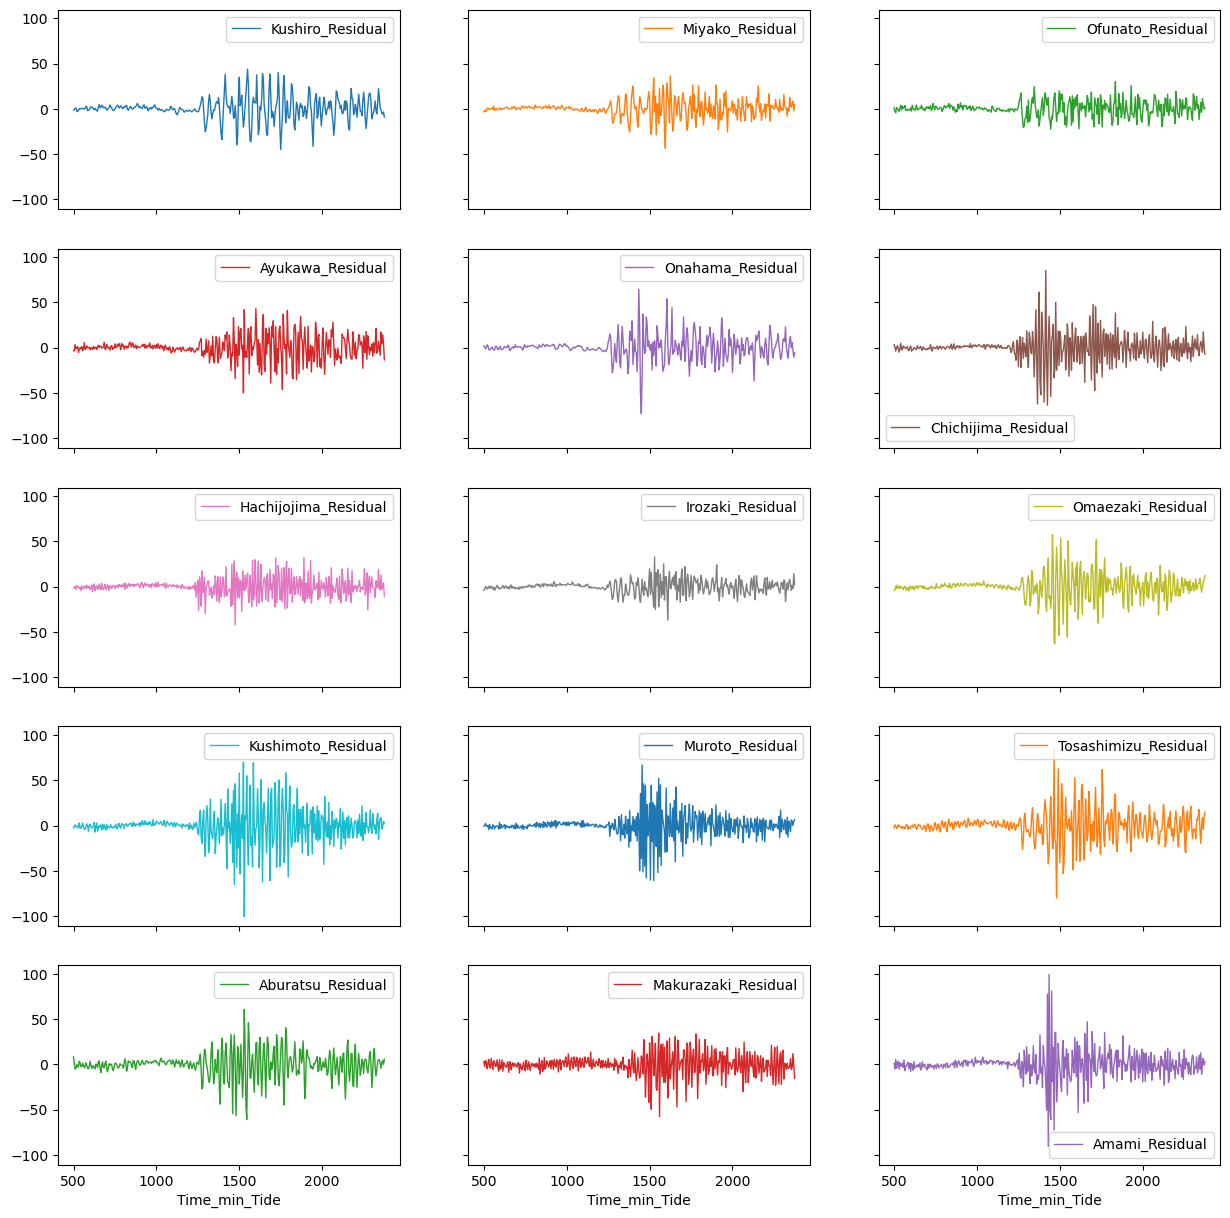

In [3]:
import matplotlib.style as mpls
mpls.use('default')

dftk.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);


In [4]:
dftk.tail()

Kushiro_Residual  Miyako_Residual  Ofunato_Residual  \
Time_min_Tide                                                        
2355                  -1.577197         1.661348         -4.039805   
2360                  -5.355581         5.848822         11.095432   
2365                  -6.079707         8.092937          5.280809   
2370                  -3.750353        -2.608053         -0.489047   
2375                  -9.368262         4.743889          0.781359   

               Ayukawa_Residual  Onahama_Residual  Chichijima_Residual  \
Time_min_Tide                                                            
2355                  17.260744         -0.185679             2.370513   
2360                   4.179933          5.592042            -5.105530   
2365                  14.170637         -3.572953            17.462826   
2370                   5.233585        -10.680691             1.075927   
2375                 -13.631046         -5.730946            -7.266202   

               Hachijojima_Residual  Irozaki_Residual  Omaezaki_Residual  \
Time_min_Tide                                                              
2355                      12.891561         -4.239322          -6.267461   
2360                      -3.355142          1.226794           0.234695   
2365                       0.456973         -2.252521           5.795879   
2370                       4.330467         14.327267           6.417992   
2375                     -10.732385          1.970319          12.102641   

               Kushimoto_Residual  Muroto_Residual  Tosashimizu_Residual  \
Time_min_Tide                                                              
2355                     8.813370         6.120936             -0.136478   
2360                    -4.006484         4.963074              8.588119   
2365                    -0.782449        -0.153726             -4.650240   
2370                     4.486997         4.775731              9.152432   
2375                     2.803411         6.756392             15.000134   

               Aburatsu_Residual  Makurazaki_Residual  Amami_Residual  
Time_min_Tide                                                          
2355                   -4.212240            -5.645709      -10.788134  
2360                    2.503374            -3.801118        2.566572  
2365                    4.254859            12.023891        6.943339  
2370                    0.045630            -2.161575       -0.653594  
2375                    5.879031           -15.348210        2.780005

Text(0, 0.5, 'Power Spectral Density (dB/Hz)')

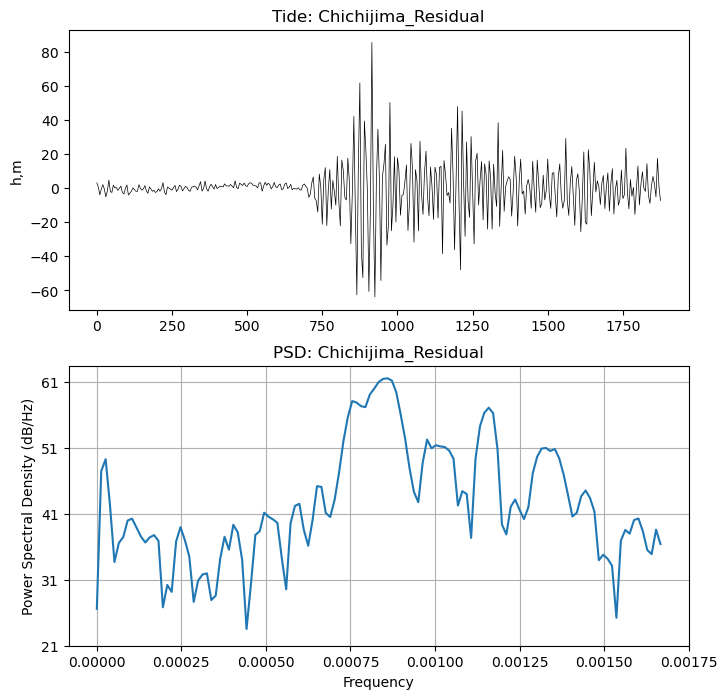

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
mpls.use('default')

col = 5
dt = 5*60
sign = dftk.iloc[:,col].to_numpy()
xt = np.arange(0,dftk.shape[0]*5,5)

fig,axs = plt.subplots(2,sharex=False,figsize=(8,8))

axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dftk.columns[col]}')

axs[1].psd(sign,NFFT=256,Fs=1/dt,noverlap=128)
# s,f,t,im = axs[1].specgram(sign,Fs=5/dt,cmap='jet')#,vmin=0,vmax=14)
axs[1].set_title(f'PSD: {dftk.columns[col]}')
# axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Frequency')
# axs[1].set_xticks(xt)
# axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
# axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].set_ylim(10e-2,5e-1)

Text(0, 0.5, 'Power Spectral Density (dB/Hz)')

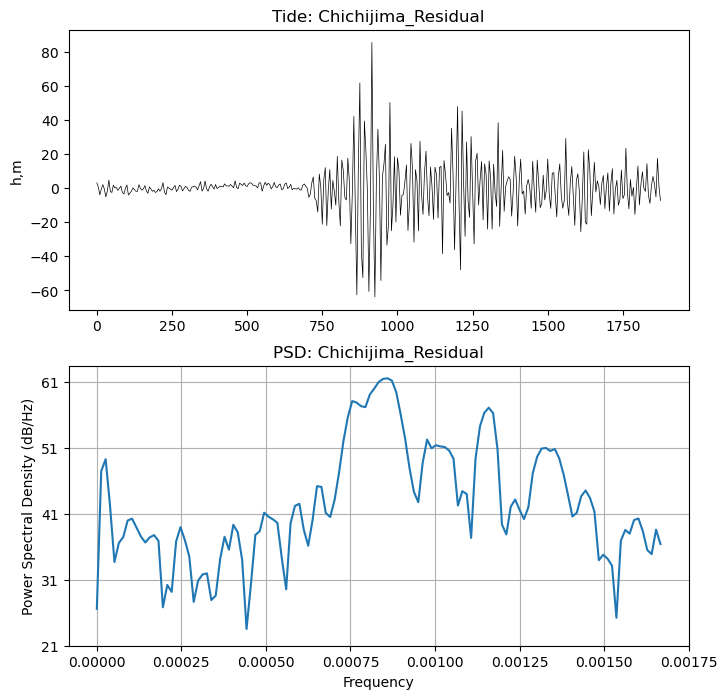

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
mpls.use('default')

col = 5
dt = 5*60
sign = dftk.iloc[:,col].to_numpy()
xt = np.arange(0,dftk.shape[0]*5,5)

fig,axs = plt.subplots(2,sharex=False,figsize=(8,8))

axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dftk.columns[col]}')

axs[1].psd(sign,NFFT=256,Fs=1/dt,noverlap=128)
# s,f,t,im = axs[1].specgram(sign,Fs=5/dt,cmap='jet')#,vmin=0,vmax=14)
axs[1].set_title(f'PSD: {dftk.columns[col]}')
# axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Frequency')
# axs[1].set_xticks(xt)
# axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
# axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].set_ylim(10e-2,5e-1)

# Continous Wavelet Transform

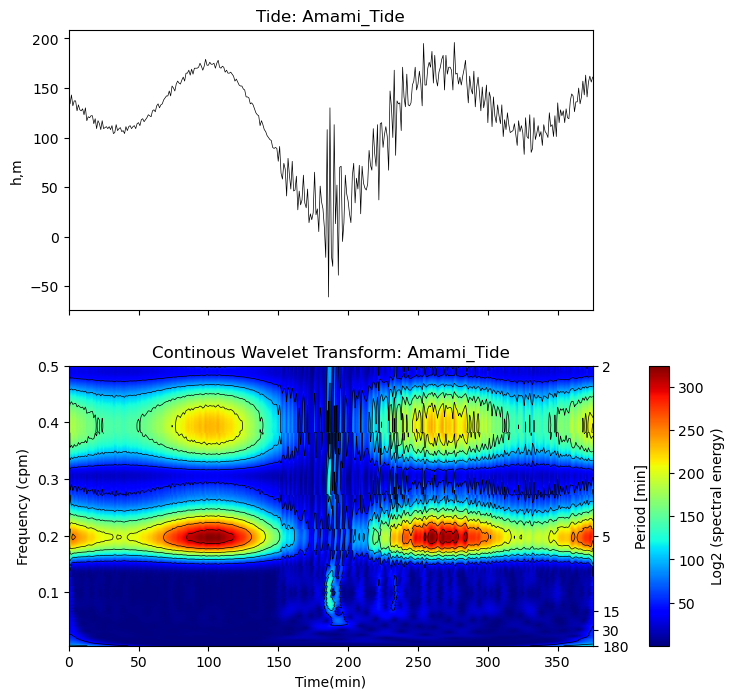

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

df_cwt = dft
col = 14
sign = df_cwt.iloc[:,col].to_numpy()
xt = np.arange(0,df_cwt.shape[0],1)
## RIcker (Mexican hat)
# a,b = 2,180 #is this 10min to 900min=15h?
# widths = np.arange(a,b)
# cwtmatr = signal.cwt(sign,signal.ricker,widths)

## Morlet
fs = 1/5
w=6.
freq=np.linspace(1/180,1/2,len(sign))
p = [1/x for x in freq]
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)

fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
xt = np.arange(0,df_cwt.shape[0],1)
axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

im = axs[1].pcolormesh(xt,freq, np.abs(cwtm), cmap='jet', 
                       shading='gouraud')
                      # vmin=120,vmax=140)
                      #  vmin=-abs(cwtm).max(),vmax=abs(cwtm).max())
# im = axs[1].imshow(cwtmatr,cmap='jet',extent=[0,len(sign),a,b],aspect='auto',
                  #  vmin=-10,vmax=5)
                #    vmin=-abs(cwtmatr).max(),vmax=abs(cwtmatr).max())

axs[1].contour(xt,freq,np.abs(cwtm),colors='k',origin='upper',linewidths=0.5)
axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
# # axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Time(min)')
# # axs[1].set_xticks(xt)
# # axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Frequency (cpm)')
# # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].set_ylim(a,b)


secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,15,30,180])
secax.set_yticklabels([2,5,15,30,180])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.78)
cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
fig.colorbar(im,cax=cbar_ax,label='Log2 (spectral energy)')

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')
plt.ioff()

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def cwt_plot(col,df_cwt,save=False):
  col = col
  sign = df_cwt.iloc[:,col].to_numpy()
  xt = np.arange(0,df_cwt.shape[0],1)
  ## Morlet
  fs = 1/5
  w=6.
  freq=np.linspace(1/180,1/2,len(sign))
  widths = w*fs / (2*freq*np.pi)
  cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)
  cwtm = np.abs(cwtm)
  # cwtm = cwtm.real
  # cwtm = np.log2(cwtm)

  fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
  xt = np.arange(0,df_cwt.shape[0],1)
  axs[0].plot(xt,sign,c='k',lw=0.5)
  axs[0].set_ylabel('h,m')
  axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

  im = axs[1].pcolormesh(xt,freq,cwtm, cmap='jet', 
                        shading='gouraud',vmin=0,vmax=80)

  # axs[1].contour(xt,freq,cwtm,colors='k',origin='upper',linewidths=0.5)
  axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
  axs[1].set_xlabel('Time(min)')
  axs[1].set_ylabel('Frequency (cpm)')
  
  secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
  secax.set_yticks([2,5,15,30,180])
  secax.set_yticklabels([2,5,15,30,180])
  secax.set_ylabel('Period [min]')
  fig.subplots_adjust(right=0.78)
  cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
  fig.colorbar(im,cax=cbar_ax,label='spectral energy')
  if save:
    plt.savefig(f'./cwt_figs/{col:03d}.png')

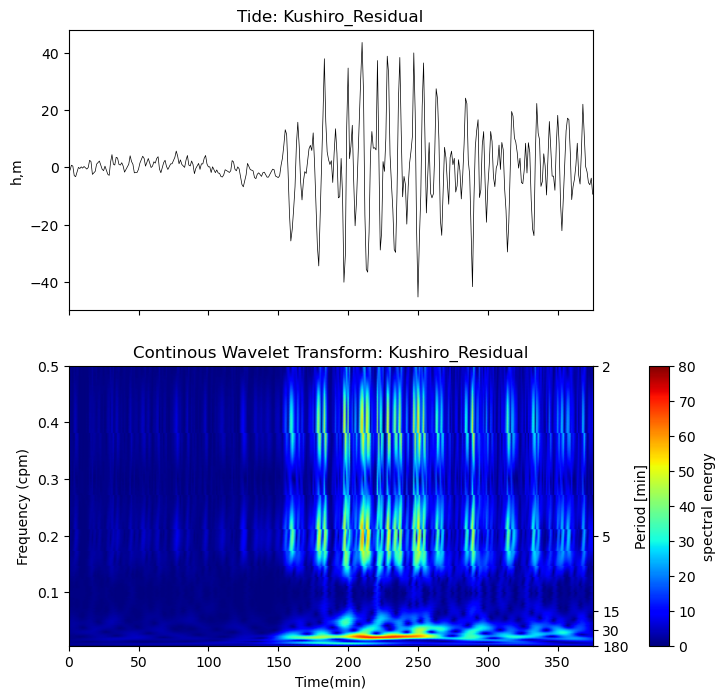

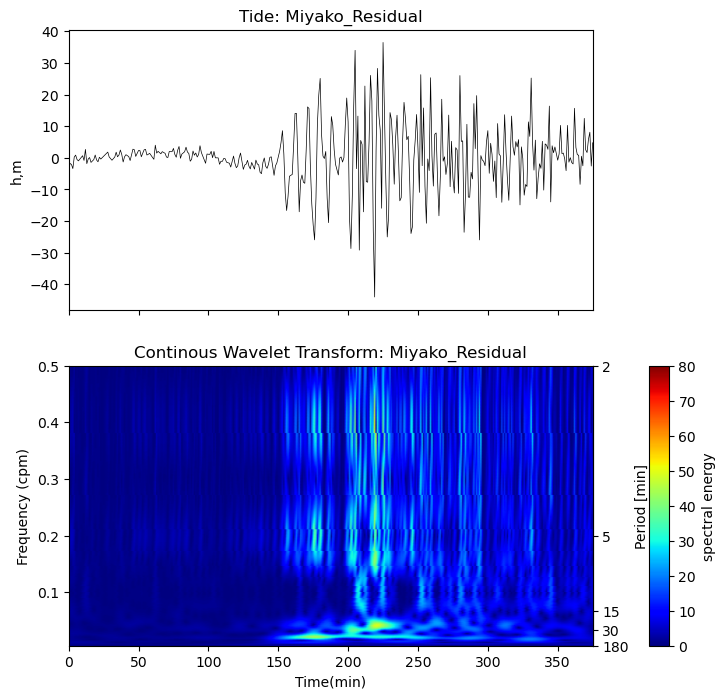

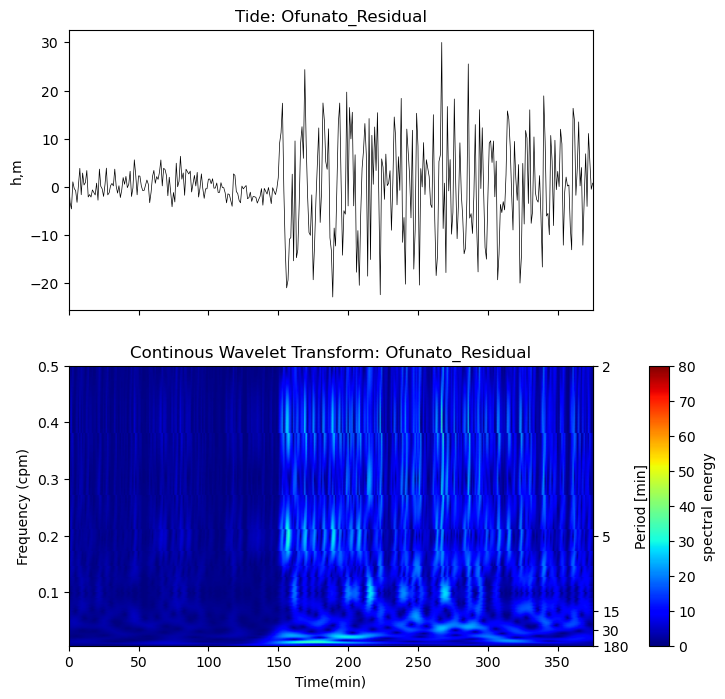

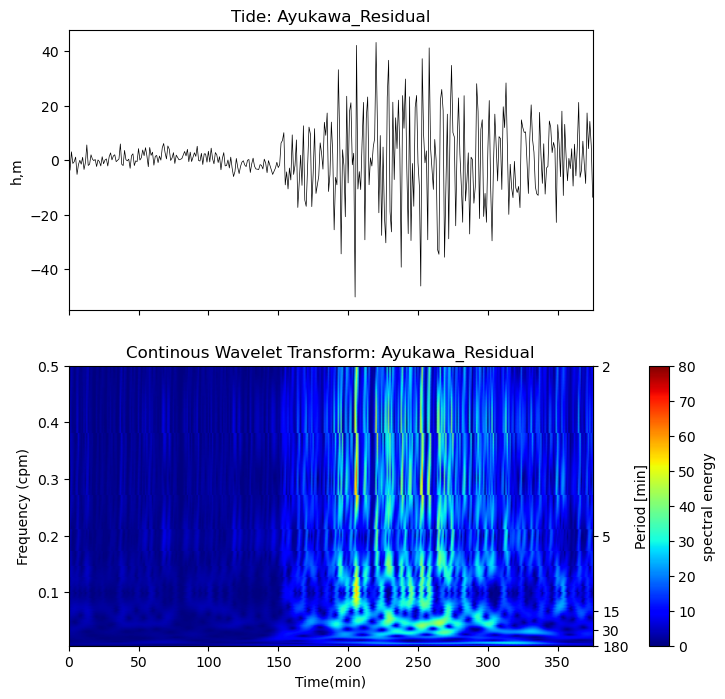

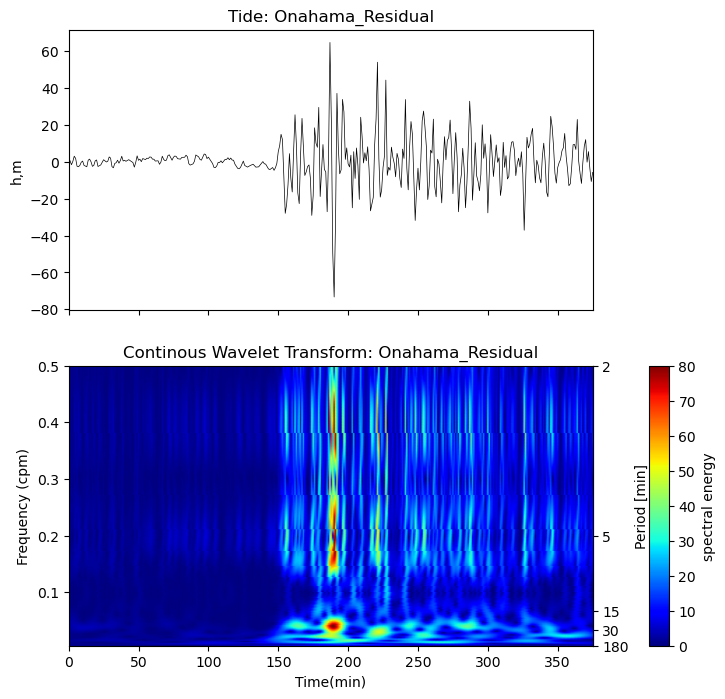

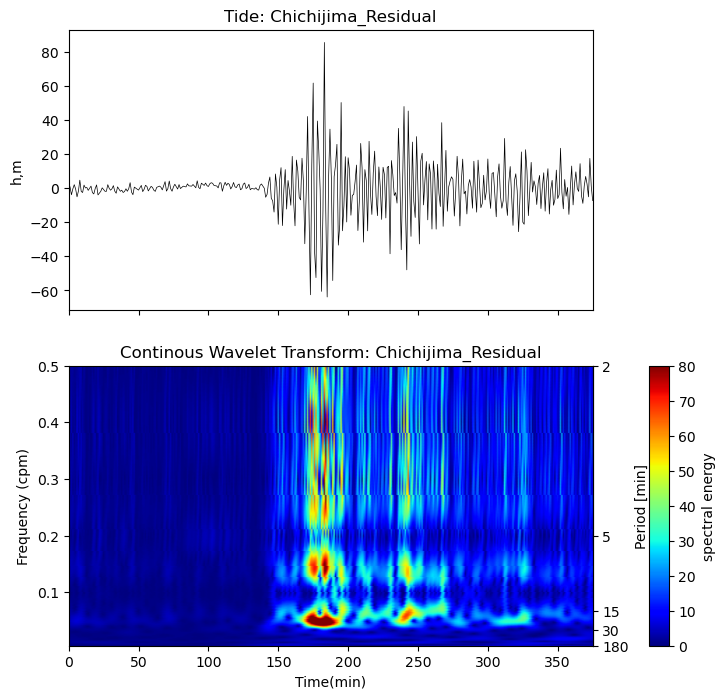

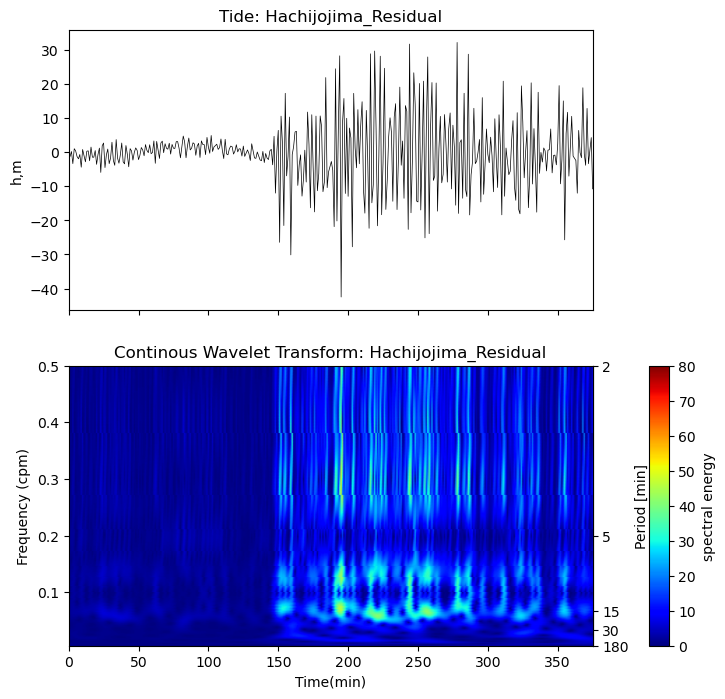

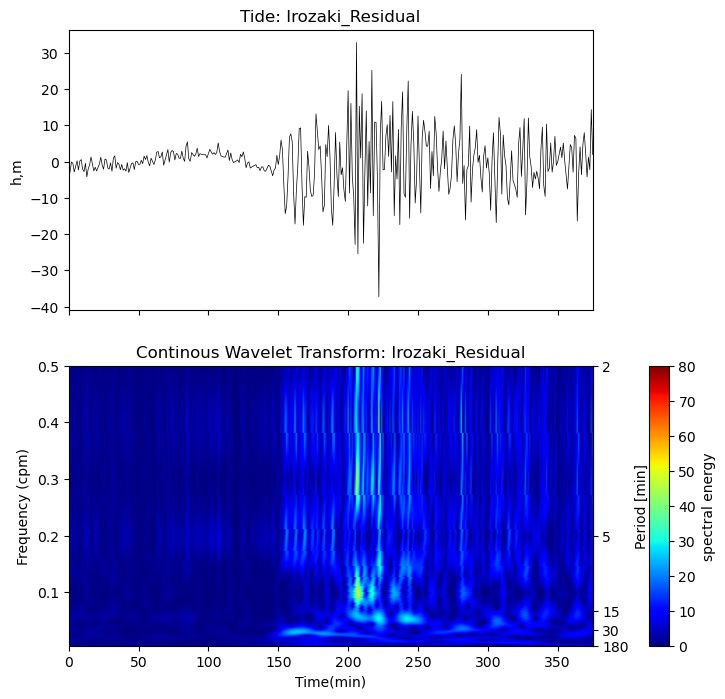

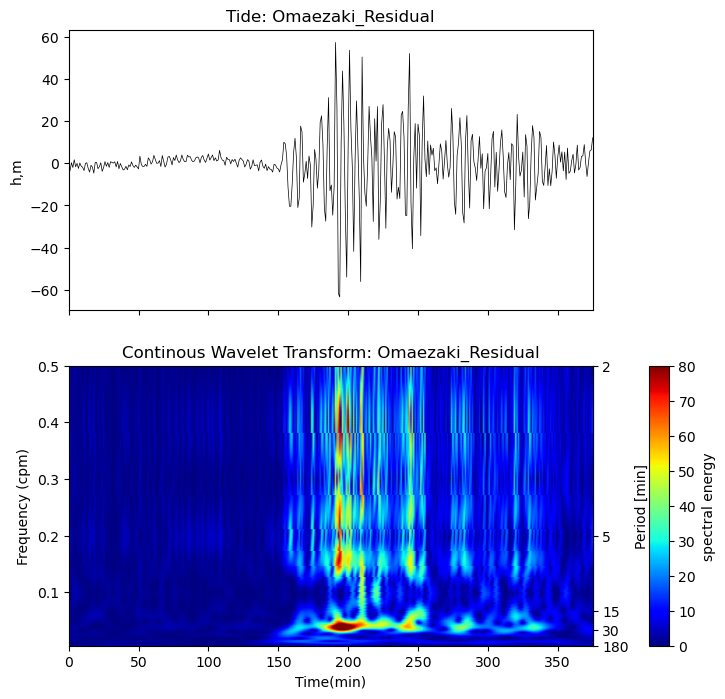

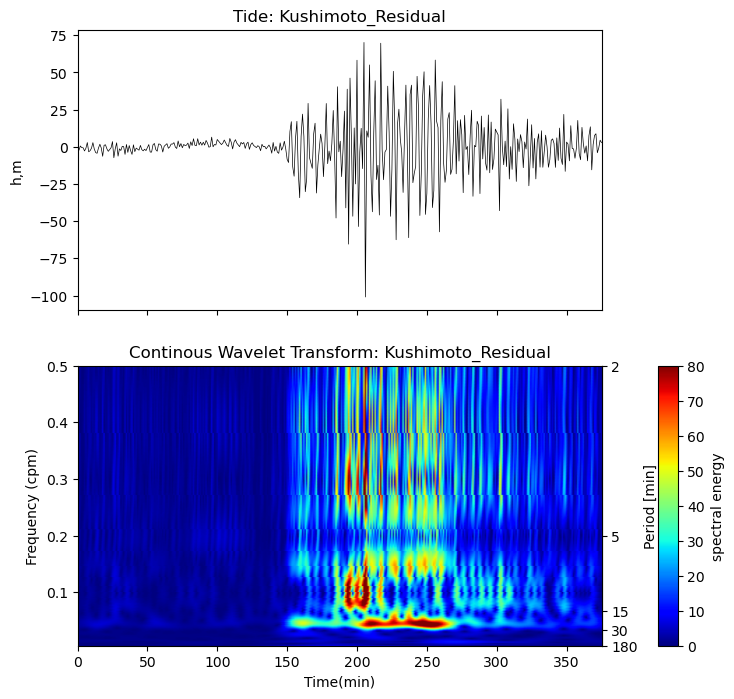

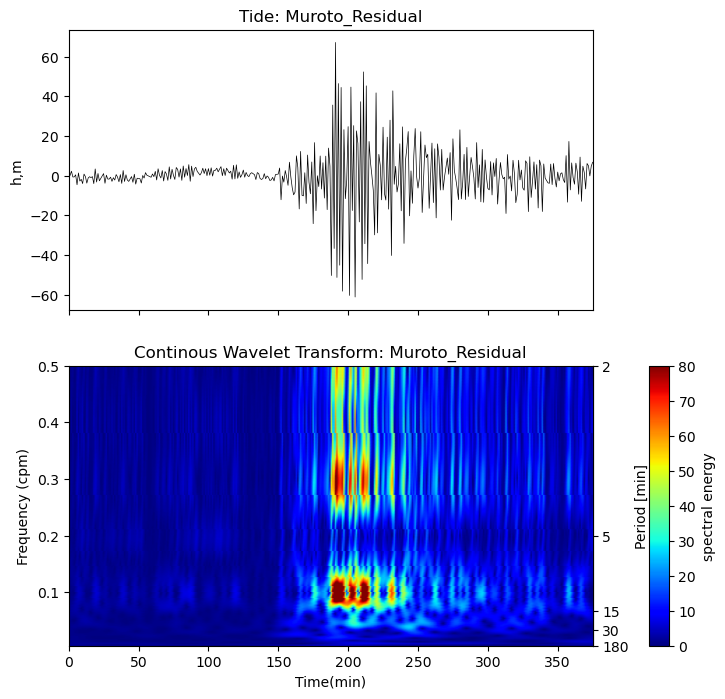

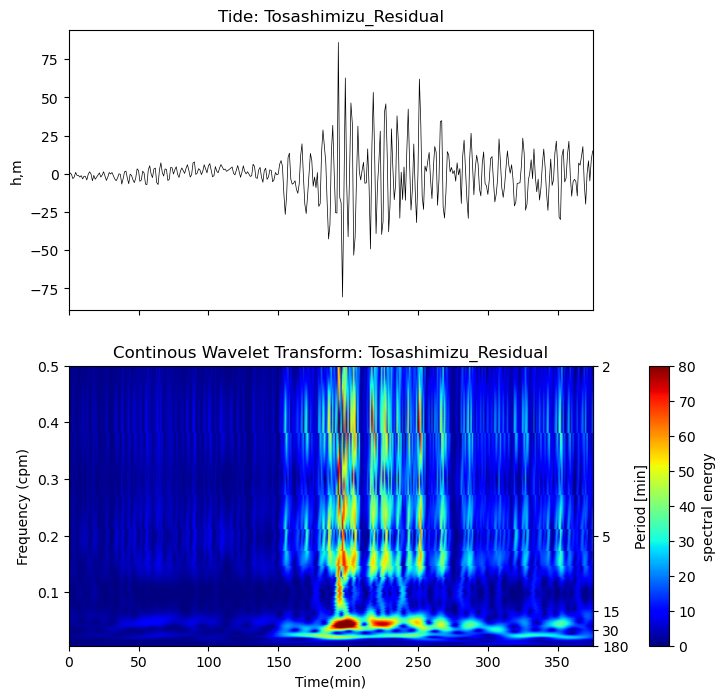

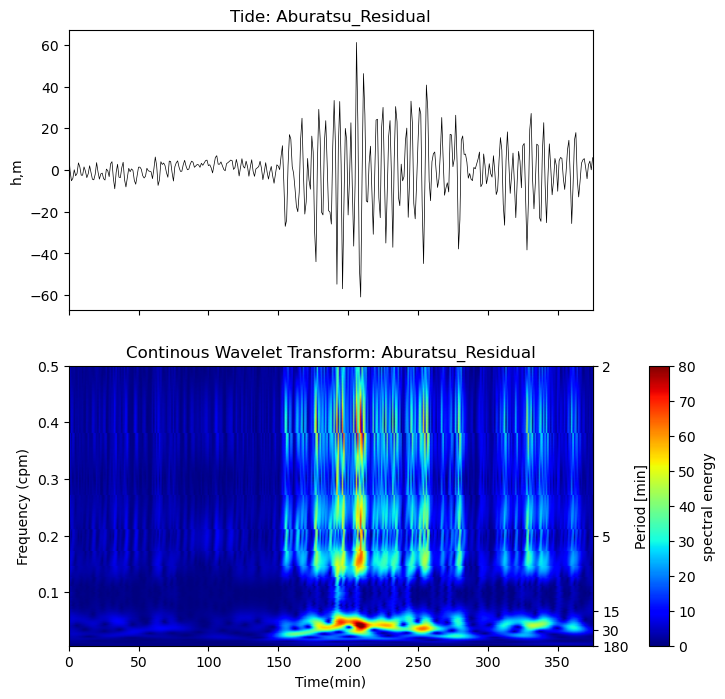

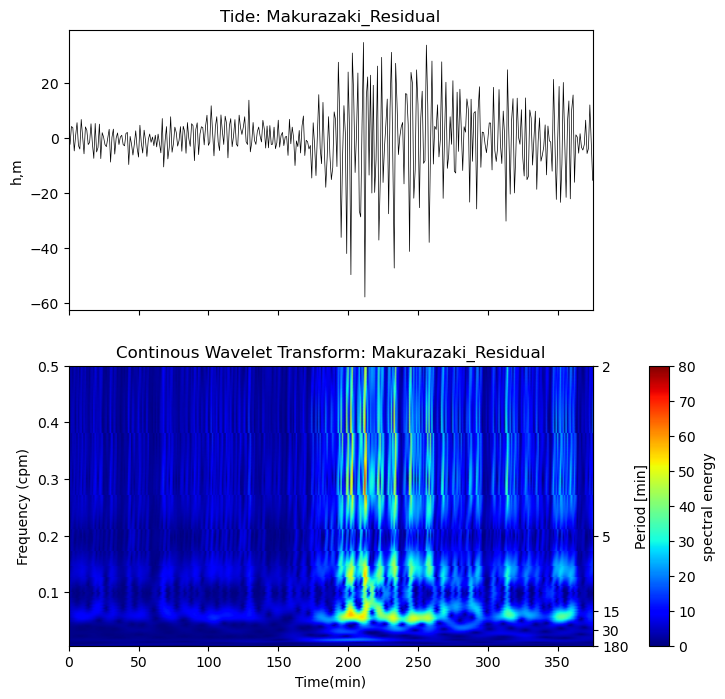

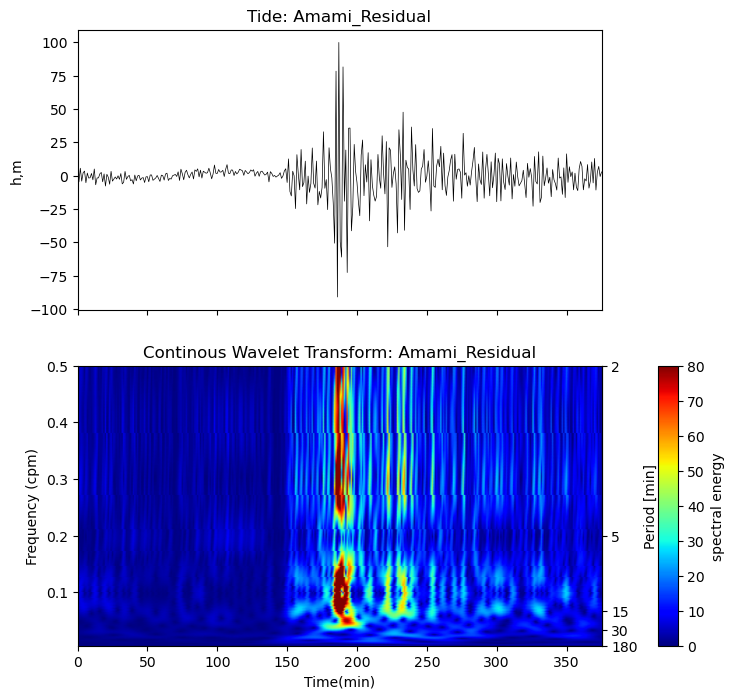

In [246]:
plt.ioff()
for i in range(15):
    cwt_plot(i,dftk,True)

----

In [140]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

dft = dftk

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def plot_spec(col=14, nfft=4, save=False, id=0):
    dt = 5
    sign = dft.iloc[:,col].to_numpy()
    xt = np.arange(0,dft.shape[0],1)
    # xl = np.arange(-250,dft.shape[0]*5,250)

    fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
    #plot waveform
    axs[0].plot(xt,sign,c='k',lw=0.5)
    axs[0].set_ylabel('h,m')
    axs[0].set_title(f'Tide: {dft.columns[col]}')
    
    #plot spectogram
    s,f,t,im = axs[1].specgram(sign,NFFT=nfft,Fs=5/dt,noverlap=nfft-2,cmap='jet',mode='psd')#,vmin=0,vmax=14)
    axs[1].set_title(f'Spectogram: {dft.columns[col]} / NFFT:{nfft}')
    # axs[1].set_xlim(500,2250)
    axs[1].set_xlabel('Time(min)')
    # axs[1].set_xticks(xt)
    # axs[1].set_xticklabels(xl)
    axs[1].set_ylabel('Frequency (cpm)')
    # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    # axs[1].set_ylim(10e-2,5e-1)

    #Second axis
    secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
    secax.set_yticks([2,5,10])
    secax.set_yticklabels([2,5,10])
    secax.set_ylabel('Period [min]')
    
    #Colobar
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
    fig.colorbar(im,cax=cbar_ax)
    cbar_ax.set_title('dB');
    
    if save:
        plt.savefig(f'./figs_k/{id:04}.png')

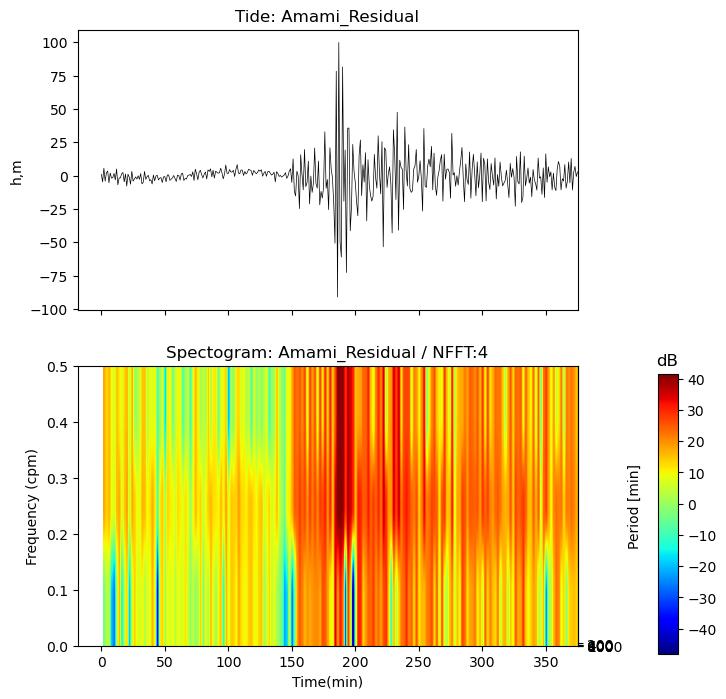

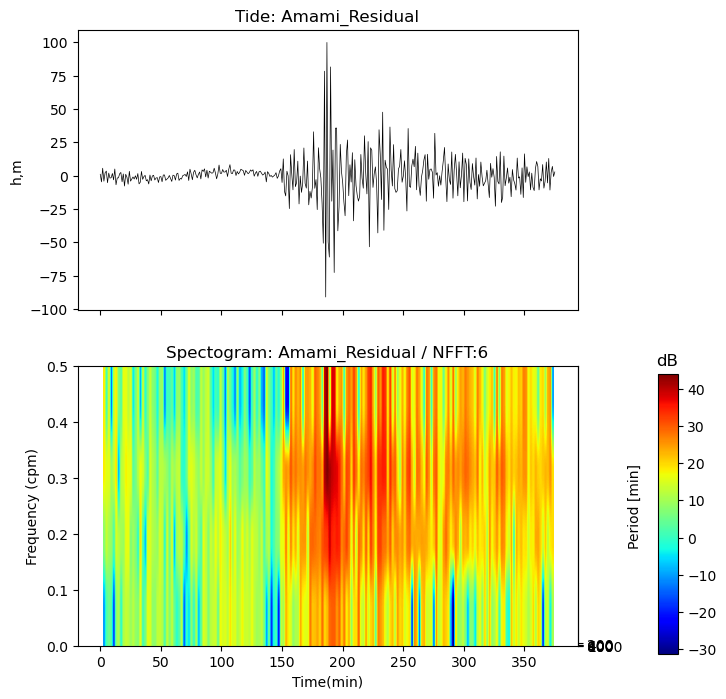

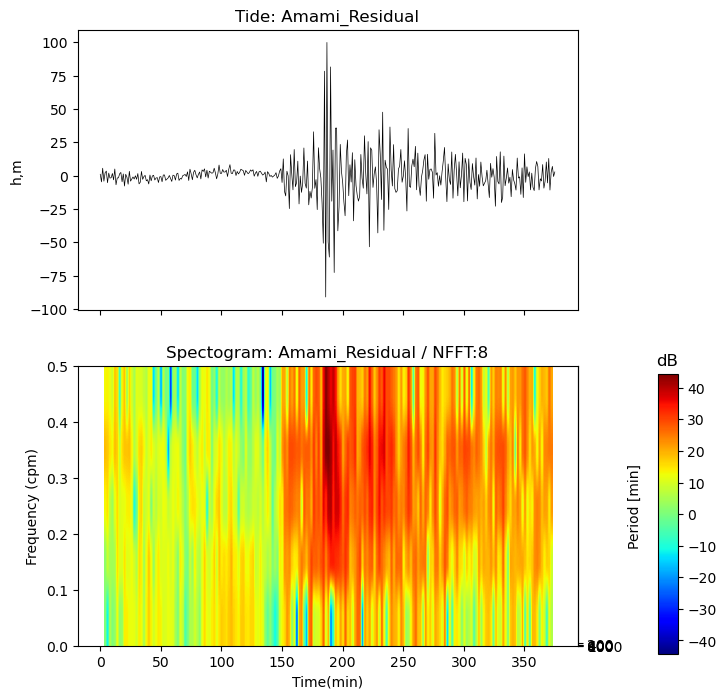

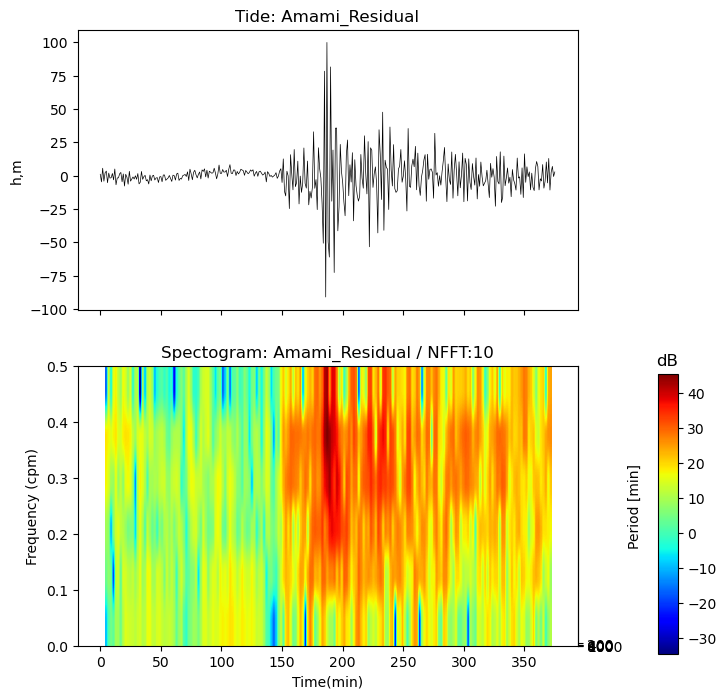

In [10]:
# cases = np.arange(4,257,1)
cases = np.arange(4,12,2)
for id in cases:
    plot_spec(14,id,False,id)

# Other options

import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

x = dft['p2'].to_numpy()

fig, ax = plt.subplots(2, figsize=(8, 7))
f, t, Sxx = signal.spectrogram(x, fs=10,window=('tukey',0.25),scaling='spectrum',mode='phase')
ax[0].pcolormesh(t, f, Sxx,cmap='jet_r')
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')

#### Note, if using output that is not one sided, then use the following:
f, t, Sxx = signal.spectrogram(x, fs=10, return_onesided=False)
ax[1].pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.savefig("fig.png")
plt.show()

def plot_point(df,id):
    df.plot(ax=ax,x='DATE(UTC)',y='ARPRSS',label=id,cmap='jet',rot=45)
    

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in df.SoratenaID.unique():
    tdf = df[df.SoratenaID == i]
    plot_point(tdf,i)

import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="DATE(UTC)", y="ARPRSS", data=df, hue='ARPRSS')